<a href="https://colab.research.google.com/github/rohanreddych/symmetrical-guacamole/blob/master/dib/conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/drive')


Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
x_list = os.listdir("/content/drive/My Drive/300-pages/split/gray")
y_list = os.listdir("/content/drive/My Drive/300-pages/split/bin")
x_list.sort()
y_list.sort()

In [0]:
print(len(x_list), len(y_list))

5328 5328


In [0]:
X = ["/content/drive/My Drive/300-pages/split/gray/"+i for i in x_list]
y = ["/content/drive/My Drive/300-pages/split/bin/"+i for i in y_list]

In [0]:
def pp(img, label):
    img = tf.io.read_file(img)
    img = tf.image.decode_png(img, channels=1)
    img = tf.image.resize(img, [128,128])
    #img = tf.reshape(img, [784,])
    img = img / 255.
    lbl = tf.io.read_file(label)
    lbl = tf.image.decode_png(lbl, channels=1)
    lbl = tf.image.resize(lbl,[128,128])
    #lbl = tf.reshape(lbl, [784,])
    lbl = lbl / 255.
    return img, lbl

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((X,y))#data

In [0]:
ds2 = dataset.map(pp)

In [0]:
for i,j in ds2.take(2):
    print(i,j)

tf.Tensor(
[[[1.        ]
  [1.        ]
  [0.9464837 ]
  ...
  [0.87388176]
  [0.8699473 ]
  [0.8784186 ]]

 [[1.        ]
  [1.        ]
  [0.9327304 ]
  ...
  [0.86865014]
  [0.88038456]
  [0.88631284]]

 [[1.        ]
  [1.        ]
  [0.9456342 ]
  ...
  [0.88235295]
  [0.88235295]
  [0.8889528 ]]

 ...

 [[1.        ]
  [1.        ]
  [0.92072713]
  ...
  [0.89867955]
  [0.91044486]
  [0.9137255 ]]

 [[1.        ]
  [1.        ]
  [0.9280582 ]
  ...
  [0.88235295]
  [0.89997697]
  [0.9058211 ]]

 [[1.        ]
  [1.        ]
  [0.9281097 ]
  ...
  [0.87587214]
  [0.8352505 ]
  [0.82347214]]], shape=(128, 128, 1), dtype=float32) tf.Tensor(
[[[1.       ]
  [1.       ]
  [1.       ]
  ...
  [1.       ]
  [1.       ]
  [1.       ]]

 [[1.       ]
  [1.       ]
  [1.       ]
  ...
  [1.       ]
  [1.       ]
  [1.       ]]

 [[1.       ]
  [1.       ]
  [1.       ]
  ...
  [1.       ]
  [1.       ]
  [1.       ]]

 ...

 [[1.       ]
  [1.       ]
  [1.       ]
  ...
  [1.       ]
  [

In [0]:
from tensorflow.keras import layers

In [0]:
model2 = tf.keras.models.Sequential([layers.InputLayer(input_shape=(128,128,1)),
                                     layers.Conv2D(64,(3,3),activation="relu", padding="same"),
                                     layers.MaxPool2D((2,2),padding="same"),
                                     layers.Conv2D(32,(3,3),activation="relu", padding="same"),
                                     layers.MaxPool2D((2,2),padding="same"),
                                     layers.Conv2D(16, (3,3), padding="same", activation="relu"),
                                     layers.MaxPool2D((2,2),padding="same"),
                                    #decoding arch
                                     layers.Conv2D(16, (3,3),activation="relu", padding="same"),
                                     layers.UpSampling2D((2,2)),
                                     layers.Conv2D(32, (3,3), activation="relu", padding="same"),
                                     layers.UpSampling2D((2,2)),
                                     layers.Conv2D(64, (3,3), activation="relu", padding="same"),
                                     layers.UpSampling2D((2,2)),
                                     layers.Conv2D(1, (3,3), padding="same"),
])

In [0]:
model2.compile(loss="mse",optimizer="adam")

In [0]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 16)       

In [0]:
ds3 = ds2.batch(16)

In [23]:
model2.fit(ds3,epochs=5)

Train for 333 steps
Epoch 1/5
333/333 [==============================] - 1534s 5s/step - loss: 0.0518
Epoch 2/5
333/333 [==============================] - 26s 79ms/step - loss: 0.0395
Epoch 3/5
333/333 [==============================] - 27s 80ms/step - loss: 0.0370
Epoch 4/5
333/333 [==============================] - 26s 77ms/step - loss: 0.0341
Epoch 5/5
333/333 [==============================] - 26s 77ms/step - loss: 0.0320


In [0]:
test_x = []
test_y = []
pred = []
for i,j in ds2.take(5):
    test_x.append(i)
    test_y.append(j)
test_x = tf.reshape(test_x,[5,128,128,1])
preds = model2.predict(test_x)

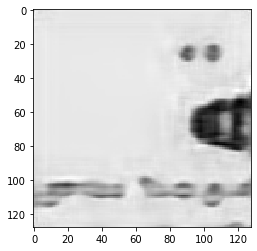

In [34]:
plt.imshow(preds[2].reshape(128,128), cmap="gray")

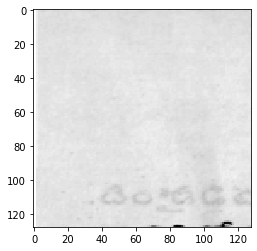

In [29]:
plt.imshow(tf.reshape(test_x[0],[128,128]), cmap="gray")

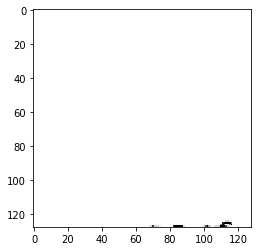

In [31]:
plt.imshow(test_y[0].numpy().reshape(128,128),cmap="gray")

In [32]:
preds[0]

array([[[0.84217817],
        [0.9435955 ],
        [0.9191104 ],
        ...,
        [0.8880064 ],
        [0.915223  ],
        [0.80825025]],

       [[0.88435155],
        [1.0140454 ],
        [0.96363103],
        ...,
        [0.8759959 ],
        [0.96198803],
        [0.9517612 ]],

       [[0.93523467],
        [0.97357607],
        [0.94188195],
        ...,
        [0.893379  ],
        [0.9009556 ],
        [0.89499503]],

       ...,

       [[0.9387801 ],
        [0.9291205 ],
        [0.9149349 ],
        ...,
        [0.9233862 ],
        [0.94401103],
        [0.9477491 ]],

       [[0.96167606],
        [0.94089353],
        [0.92813486],
        ...,
        [0.93636763],
        [0.9922187 ],
        [0.97817165]],

       [[0.821492  ],
        [0.94109017],
        [0.9540443 ],
        ...,
        [0.91081667],
        [0.9390457 ],
        [0.8307463 ]]], dtype=float32)